#  Custom KMeans Class (From Scratch)

In [1]:
import numpy as np

class CustomKMeans:
    """
    Custom implementation of K-Means clustering algorithm.

    Parameters:
    -----------
    n_clusters : int
        The number of clusters to form (K).

    max_iter : int
        Maximum number of iterations for the algorithm.

    tol : float
        Convergence tolerance (used to check if centroids have stopped moving).

    random_state : int or None
        Seed for random number generator (for reproducibility).
    """
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        """
        Compute K-Means clustering.

        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            The input data to cluster.
        """
        if self.random_state:
            np.random.seed(self.random_state)

        # Randomly choose initial centroids
        random_idx = np.random.permutation(len(X))[:self.n_clusters]
        self.centroids = X[random_idx]

        for iteration in range(self.max_iter):
            # Assign clusters based on closest centroid
            distances = self._compute_distances(X)
            labels = np.argmin(distances, axis=1)

            # Recompute centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            diff = np.linalg.norm(self.centroids - new_centroids)
            if diff < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        """
        Predict the closest cluster for each sample in X.

        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            New data to predict.

        Returns:
        --------
        labels : ndarray of shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X):
        """
        Compute Euclidean distance from each point to each centroid.
        """
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)


# Example Usage

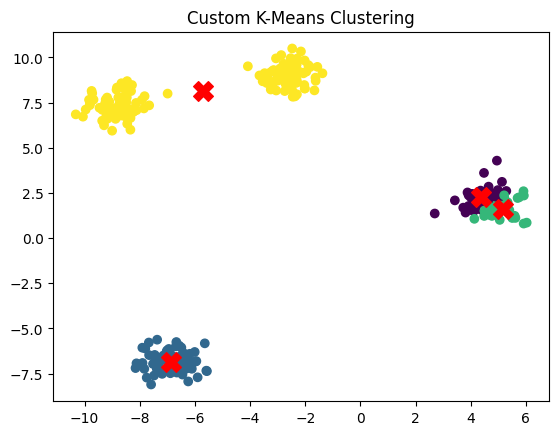

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Fit custom KMeans
model = CustomKMeans(n_clusters=4, max_iter= 1500, random_state=42)
model.fit(X)
labels = model.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=200, c='red', marker='X')  # centroids
plt.title("Custom K-Means Clustering")
plt.show()
